# **🛍️ Voices Behind the Stars: Sentiment Analysis of Amazon Product Reviews for Consumer Insight**

# **💡 Problem Statement**

 🧩 **Problem Overview**

In today’s digital retail landscape, customer reviews on platforms like Amazon play a crucial role in shaping purchasing decisions. With millions of reviews spanning countless products, manually analyzing this data is neither scalable nor efficient.

This project aims to leverage sentiment analysis, a natural language processing technique, to automatically classify Amazon product reviews as Positive, Neutral, or Negative. By building a machine learning model that understands the emotional tone of customer feedback—using textual reviews, ratings, and product features—businesses can gain real-time insights into customer satisfaction, detect potential issues early, and make smarter, data-driven decisions.

**🧠 Industry & Problem Type**

This project falls within the e-commerce and retail industry, focusing on enhancing customer experience through data-driven insights. It involves a supervised machine learning approach, specifically a multi-class text classification task using Natural Language Processing (NLP). The aim is to predict the sentiment behind customer reviews as Positive, Neutral, or Negative

**🎯 Business Objective**

With thousands of reviews being generated daily, businesses need a way to extract meaningful insights at scale. The goal is to automate sentiment detection in Amazon product reviews to help sellers and brands:

  * Monitor customer satisfaction
  * Improve product offerings
  * Drive data-driven marketing and service strategies

**⚠️ Constraints & Limitations**

* Computational resources may be limited when training large NLP models
* Data noise, including typos, sarcasm, or informal language, can reduce accuracy
* Imbalanced sentiment classes may skew model predictions
* Budget constraints require efficient use of open-source tools and public data

**📏 Evaluation Metrics**

To measure model effectiveness, the following metrics will be used:

* Accuracy – To assess overall performance
* Precision, Recall, and F1-Score – To handle class imbalance
* Confusion Matrix – To identify misclassified instances
* Cross-validation – To ensure consistent performance across data splits

**👥 Relevance to the Target Audience**

This model is highly relevant for:
* Sellers and Brands – To monitor product reputation
* Product Teams – To drive improvements based on user sentiment
* Marketing Teams – To shape messaging and strategy

The model must deliver quick, reliable predictions suitable for integration into dashboards or real-time feedback loops.

**📦 Data Availability**

The dataset includes a wide range of useful features:

* **Textual data**: Review titles and detailed review content
* **Rating data**: Star ratings and rating count
* **Product metadata**: Name, category, and pricing details

This rich feature set ensures a strong foundation for training effective machine learning models.

**🚀 Scope of the Solution**

This solution aims to:

* Classify reviews into sentiment categories automatically
* Offer insights to guide business decisions
* Be scalable for large datasets and usable across different product categories
* Lay the foundation for advanced features like emotion analysis or multilingual sentiment classification

## **📂 Dataset Information**

This dataset contains detailed information about Amazon products and customer reviews. It combines structured product data with unstructured review text, making it suitable for both exploratory data analysis and Natural Language Processing (NLP) tasks like sentiment analysis.

*  **Key Highlights**:
  
  * Source: Kaggle
  * Format: CSV file
  * Records: 1465 rows
  * Features: 16 columns including product details, pricing, customer ratings, and review content
  * Domain: E-commerce, Retail, Customer Experience

**🔗 Dataset Source** : https://www.kaggle.com/code/mehakiftikhar/amazon-sales-dataset-eda

#  📥 **Data Collection**

In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import string
import nltk
#  NLP-specific libraries
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
# For TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
# For scaling numerical data
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
# for model building and evaluation
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Loading the dataset from a CSV file into a DataFrame
filepath = "amazon.csv"
df = pd.read_csv(filepath)
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [ ]:
# Taking a first look at the dataset
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# Dataset Rows & Columns count
num_row,num_col = df.shape # Get the number of rows and columns in the dataset
print(f"The dataset has {num_row} rows and {num_col} columns.")

The dataset has 1465 rows and 16 columns.


In [ ]:
# Display all feature names in the dataset
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

**🧾 Features Overview**

* **product_id**: Unique identifier for each product

* **product_name**: Name/title of the product

* **category**: Category to which the product belongs

* **discounted_price**: Final price after applying discounts

* **actual_price**: Original price before any discount

* **discount_percentage**: Percentage of discount offered

* **rating**: Average user rating for the product

* **rating_count**: Total number of user ratings

* **about_product**: Description or key details about the product

* **user_id**: Unique identifier for each user/reviewer

* **user_name**: Name of the user who wrote the review

* **review_id**: Unique identifier for each review

* **review_title**: Short summary or title of the review

* **review_content**: Full review text written by the customer

* **img_link**: Link to the product image

* **product_link**: URL to the product page on Amazon

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"The dataset has {duplicate_count} duplicate values.")

The dataset has 0 duplicate values.


In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
missing_values

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [ ]:
# total number of missing values
total_missing_values = missing_values.sum()
print(f"The dataset has {total_missing_values} missing values.")

The dataset has 2 missing values.


# **🧹 Data Preprocessing**

### **🔧 Data Cleaning, Type Conversion, and Feature Refinement**

In [ ]:
# Columns to clean
price_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

# Function to clean and convert to numeric
def clean_column(col):
    return pd.to_numeric(
        df[col]
        .astype(str)
        .str.replace('₹', '', regex=False)      # Remove rupee symbol
        .str.replace('%', '', regex=False)      # Remove percent sign
        .str.replace(',', '', regex=False)      # Remove commas if present
        .str.strip()
        .replace('|', np.nan),                  # Replace '|' with NaN
        errors='coerce'
    )

# Apply cleaning function to each column
for col in price_columns:
    df[col] = clean_column(col)

# Confirm changes
df[price_columns].dtypes

,0
discounted_price,float64
actual_price,float64
discount_percentage,int64
rating,float64
rating_count,float64


In [ ]:
# Checking the number of missing values in each column
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,1
rating_count,2
about_product,0
user_id,0


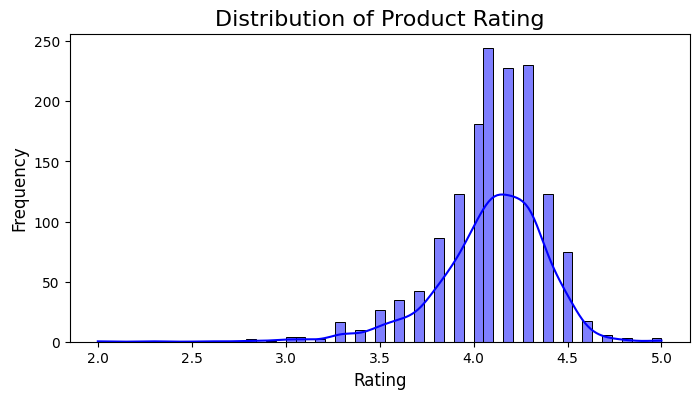

In [ ]:
# Plotting the distribution of the 'rating' column
plt.figure(figsize=(8, 4))
sns.histplot(df['rating'], kde=True, color='blue', edgecolor='black')

# Adding plot title and labels
plt.title('Distribution of Product Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

In [ ]:
# Since the rating data is left-skewed, median imputation is used to handle missing values
median_income = df['rating'].median()
df['rating'] = df['rating'].fillna(median_income)

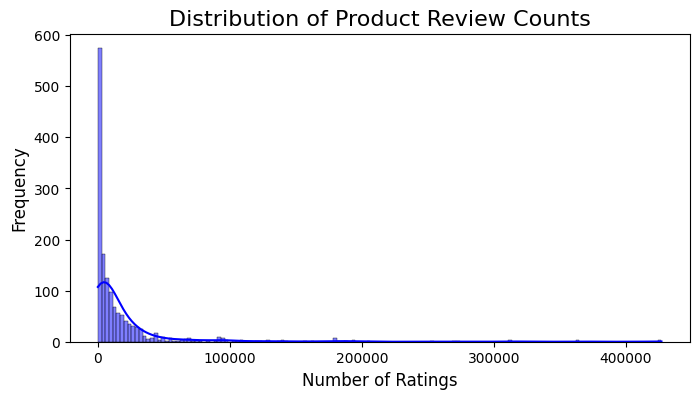

In [ ]:
# Plotting the distribution of  rating counts
plt.figure(figsize=(8, 4))
sns.histplot(df['rating_count'], kde=True, color='blue', edgecolor='black')

# Adding plot title and labels
plt.title('Distribution of Product Review Counts', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

In [ ]:
# Since the rating_count data is right-skewed, median imputation is used to handle missing values
median_income = df['rating_count'].median()
df['rating_count'] = df['rating_count'].fillna(median_income)

In [ ]:
# Verifying if any missing values remain in the dataset after imputation.
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# Dropping irrelevant columns (img_link and product_link)
df = df.drop(['img_link', 'product_link'], axis=1)

# Checking the shape of the DataFrame after dropping the columns
print(f"Dataset shape after dropping irrelevant columns: {df.shape}")

Dataset shape after dropping irrelevant columns: (1465, 14)


In [ ]:
# Overview of key statistical insights for numerical features following data refinement
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.096587,18277.634812
std,6944.304394,10874.826864,21.635905,0.291574,42727.398216
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


### **📝 Text Preprocessing (NLP-specific)**

In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Define a function to convert numerical ratings into sentiment labels
def get_sentiment(rating):
    if rating >= 4 :
        return 'Positive'
    elif rating < 4 and rating >=3.5:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to create a new column called 'sentiment_label'
df['sentiment_label'] = df['rating'].apply(get_sentiment)

# Let's check how many of each sentiment we have
print(df['sentiment_label'].value_counts())

sentiment_label
Positive    1111
Neutral      312
Negative      42
Name: count, dtype: int64


In [ ]:
# Fill missing values with empty strings to avoid errors
df['review_title'] = df['review_title'].fillna('')
df['review_content'] = df['review_content'].fillna('')

# Combine both columns into a new one called 'full_review'
df['full_review'] = df['review_title'] + " " + df['review_content']

# Quick look at combined text
df[['review_title', 'review_content', 'full_review']].head()

,review_title,review_content,full_review
0,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"Satisfied,Charging is really fast,Value for mo..."
1,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,"A Good Braided Cable for Your Type C Device,Go..."
2,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...","Good speed for earlier versions,Good Product,W..."
3,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...","Good product,Good one,Nice,Really nice product..."
4,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...","As good as original,Decent,Good one for second..."


In [ ]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]
    # Rejoin cleaned words
    return ' '.join(words)

# Apply cleaning function to 'full_review' and store in new column
df['cleaned_review'] = df['full_review'].apply(clean_text)

# Preview cleaned text
df[['full_review', 'cleaned_review']].head()

,full_review,cleaned_review
0,"Satisfied,Charging is really fast,Value for mo...",satisfiedcharging really fastvalue moneyproduc...
1,"A Good Braided Cable for Your Type C Device,Go...",good braided cable type c devicegood quality p...
2,"Good speed for earlier versions,Good Product,W...",good speed earlier versionsgood productworking...
3,"Good product,Good one,Nice,Really nice product...",good productgood onenicereally nice productver...
4,"As good as original,Decent,Good one for second...",good originaldecentgood one secondary usebest ...


In [ ]:
# Sentiment polarity from TextBlob
df['sentiment_score'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Word & character counts
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))
df['char_count'] = df['cleaned_review'].apply(len)

# Optional alias
df['review_length'] = df['char_count']

In [ ]:
# Initialize the vectorizer with reasonable settings
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Apply TF-IDF transformation to the cleaned text
X_text = vectorizer.fit_transform(df['cleaned_review'])

# Check shape of the resulting matrix
print("TF-IDF matrix shape:", X_text.shape)

TF-IDF matrix shape: (1465, 5000)


In [ ]:
# Define numeric features
numeric_cols = ['discounted_price', 'actual_price', 'rating_count',
                'sentiment_score', 'word_count', 'char_count']

# Fill missing numeric values with 0
df[numeric_cols] = df[numeric_cols].fillna(0)

# # Initialize scaler
scaler = StandardScaler()
# Fit and transform
X_num = scaler.fit_transform(df[numeric_cols])

In [ ]:
# Final feature set (TF-IDF + Scaled numeric features)
X_final = hstack([X_text, X_num])

# Target variable
y = df['sentiment_label']

# Now X_final and y are ready for model training!
print("Preprocessing complete.Final feature matrix shape:", X_final.shape)
print("Target shape:", y.shape)

Preprocessing complete.Final feature matrix shape: (1465, 5006)
Target shape: (1465,)


## **🔍  Exploratory Data Analysis (EDA) — Get the Insights**

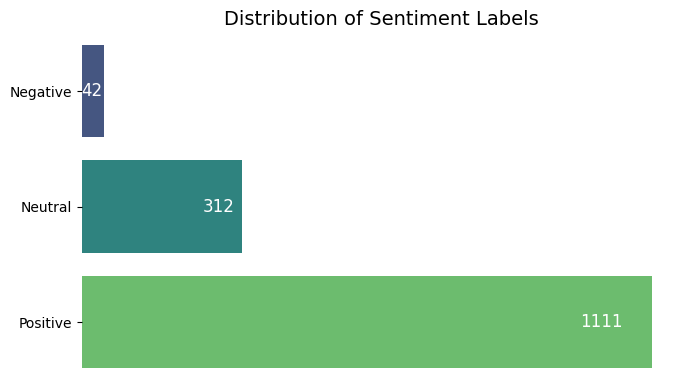

In [ ]:
# Visualizing the distribution of sentiment labels
def plot_sentiment_distribution(df):
    """
    Plots the number of reviews for each sentiment class using a horizontal bar plot
    with count labels inside each bar and x-axis removed for a cleaner look.
    """
    sentiment_counts = df['sentiment_label'].value_counts().sort_values(ascending=True)

    plt.figure(figsize=(7, 4)),
    ax = sns.barplot(y=sentiment_counts.index, x=sentiment_counts.values,hue =sentiment_counts.index, palette='viridis')

    # Add count labels inside the bars
    for p in ax.patches:
        width = p.get_width()
        ax.text(width - width * 0.05, p.get_y() + p.get_height() / 2,
                f'{int(width)}', ha='right', va='center', color='white', fontsize=12)

    plt.title('Distribution of Sentiment Labels', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    ax.xaxis.set_visible(False)  # Hide the x-axis
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()
plot_sentiment_distribution(df)

**Key Insight**

The dataset is heavily skewed towards positive reviews, highlighting strong customer satisfaction—but also signaling a need to address class imbalance during model training.

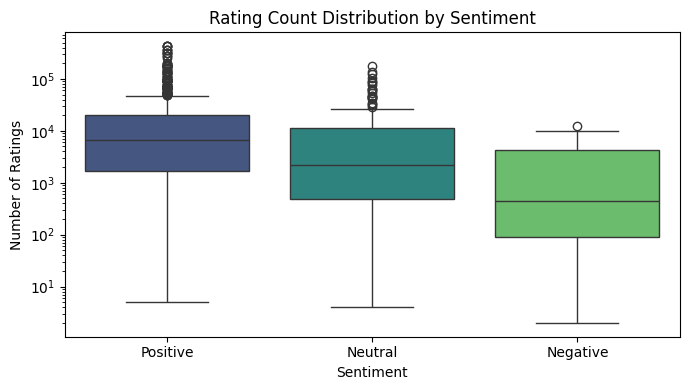

In [ ]:
# Visualizes the distribution of rating counts across sentiment labels
def plot_rating_count_by_sentiment(df):
    """
    Displays how the number of ratings varies across sentiment labels using a boxplot.
    """
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x='sentiment_label', y='rating_count',hue ='sentiment_label',  palette='viridis')
    plt.title('Rating Count Distribution by Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Ratings')
    plt.yscale('log')  # Log scale for better visibility if outliers exist
    plt.tight_layout()
    plt.show()
plot_rating_count_by_sentiment(df)

**Engagement Trends Across Review Sentiments**

The box plot reveals that positive reviews receive the highest and most varied ratings, reflecting strong user engagement. Neutral reviews show moderate variability, while negative reviews exhibit the lowest and most consistent ratings, indicating limited interaction.

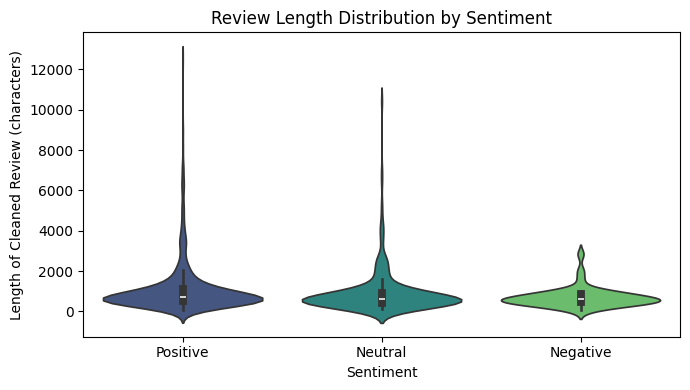

In [ ]:
# Visualizes the distribution of review lengths across sentiment labels
def plot_review_length_distribution(df):
    """
    Analyzes the length of cleaned reviews by sentiment to see if verbosity differs.
    """
    # Create a new column for review text length
    df['review_length'] = df['cleaned_review'].apply(len)

    plt.figure(figsize=(7, 4))
    sns.violinplot(data=df, x='sentiment_label', y='review_length',hue='sentiment_label', palette='viridis')
    plt.title('Review Length Distribution by Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Length of Cleaned Review (characters)')
    plt.tight_layout()
    plt.show()
plot_review_length_distribution(df)

**Variation in Review Length by Sentiment**

The violin plot reveals that positive reviews are typically longer and more diverse in length, reflecting thoughtful and expressive feedback from satisfied users. Neutral reviews are moderately long with less variation, suggesting balanced responses. Negative reviews are the shortest and most uniform, indicating brief and direct expressions of dissatisfaction.

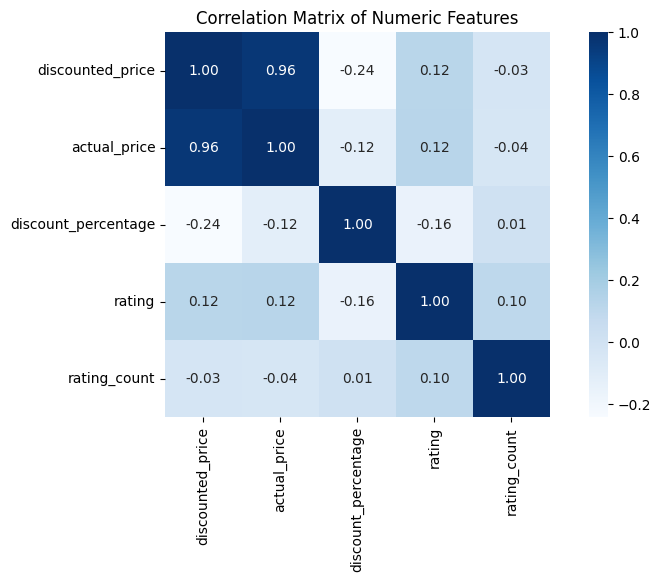

In [ ]:
# 🔗 Correlation Between Numeric Features

# Select numeric columns
num_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

# Plot correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

**Insights from the Correlation Matrix**

The correlation matrix highlights a strong positive relationship between discounted price and actual price (0.96), indicating that discounts are closely aligned with original pricing. In contrast, variables like discount percentage, rating, and rating count exhibit weak or negligible correlations with one another, suggesting that customer feedback and review volumes are largely independent of pricing and discount strategies.

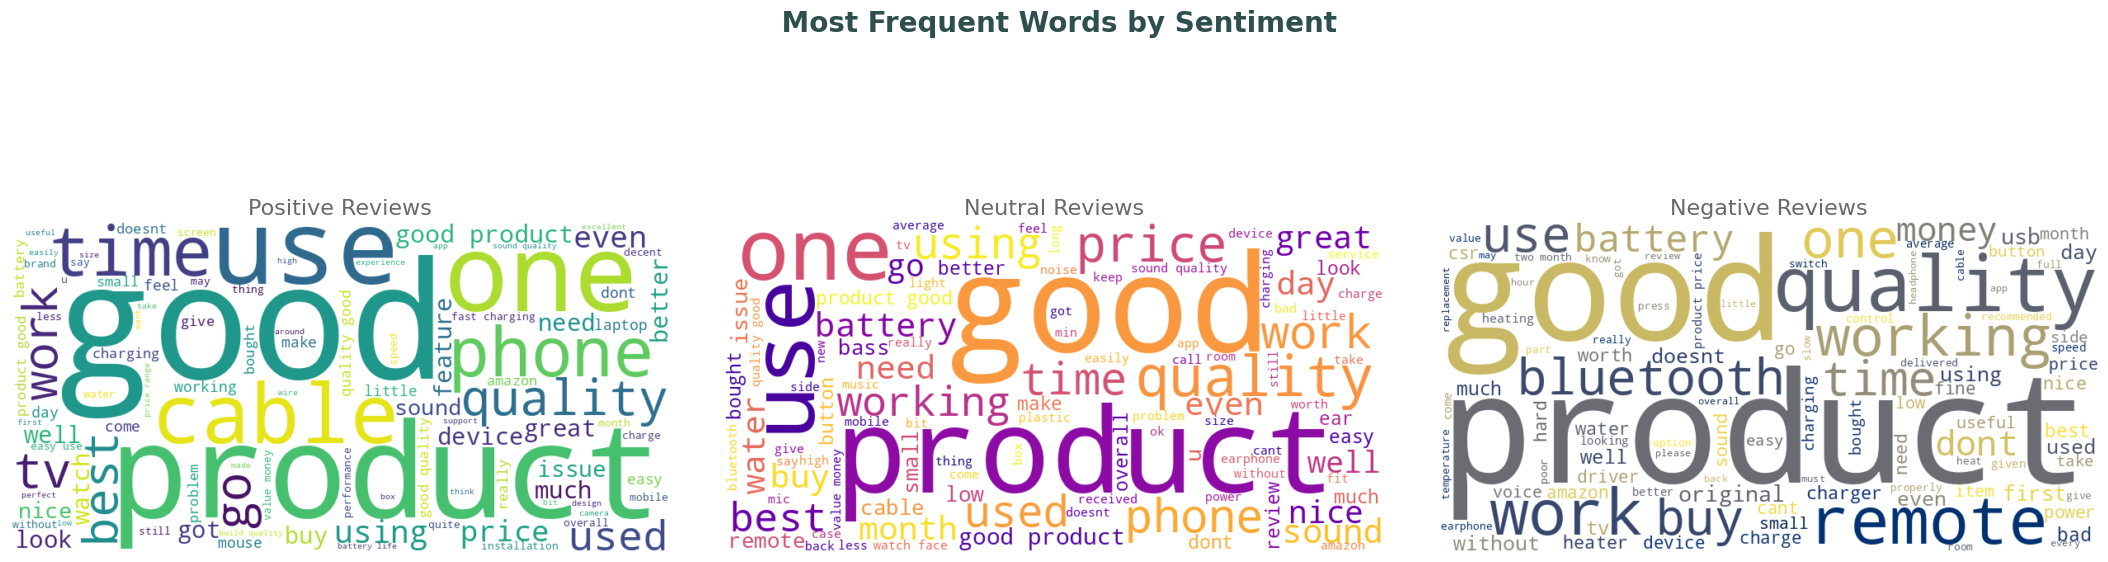

In [ ]:
# ☁️ WordCloud Visualization by Sentiment Label

def generate_wordcloud(text, colormap='viridis'):
    """
    Generate a WordCloud object from input text.

    Parameters:
        text (str): Combined cleaned review text.
        colormap (str): Color scheme for the WordCloud.

    Returns:
        WordCloud: Generated WordCloud object.
    """
    return WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=colormap,
        max_words=100,
        contour_color='steelblue',
        contour_width=1.5
    ).generate(text)

# 🔍 Function to extract text for a specific sentiment
def extract_text_by_sentiment(df, sentiment_label):
    """
    Combine all cleaned reviews for a given sentiment label.

    Parameters:
        df (DataFrame): DataFrame containing 'cleaned_review' and 'sentiment_label' columns.
        sentiment_label (str): One of ['Positive', 'Neutral', 'Negative'].

    Returns:
        str: Combined cleaned reviews for the sentiment.
    """
    return " ".join(df[df['sentiment_label'] == sentiment_label]['cleaned_review'])

# 🎨 Function to plot multiple WordClouds side-by-side
def plot_sentiment_wordclouds(df, sentiments=['Positive', 'Neutral', 'Negative'], colormaps=None):
    """
    Plot WordClouds for each sentiment category side-by-side.

    Parameters:
        df (DataFrame): DataFrame with sentiment and cleaned review data.
        sentiments (list): List of sentiment labels.
        colormaps (list): Optional list of colormaps for each WordCloud.
    """
    if colormaps is None:
        colormaps = ['viridis', 'plasma', 'cividis']

    # Set up horizontal subplots
    fig, axes = plt.subplots(1, len(sentiments), figsize=(22, 7))

    for i, sentiment in enumerate(sentiments):
        text = extract_text_by_sentiment(df, sentiment)
        wordcloud = generate_wordcloud(text, colormap=colormaps[i])

        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f"{sentiment} Reviews", fontsize=16, color='dimgray')

    # Overall title and layout adjustments
    plt.suptitle(" Most Frequent Words by Sentiment", fontsize=20, fontweight='bold', color='darkslategray')
    plt.tight_layout(pad=4)
    plt.show()

# ✅ Run the function with the DataFrame
plot_sentiment_wordclouds(df)

## **🤖 Model Selection, Training & Evaluation: 🚀 Choosing, Training, and Assessing the optimal Model for Sentiment Prediction 📊**

In [ ]:
# 📊 Data Splitting
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Test Data: {X_test.shape}")

Training Data: (1172, 5006), Test Data: (293, 5006)


In [ ]:
#  Hyperparameter Tuning with Grid Search for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
}
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters for Random Forest: {grid_search.best_params_}")

Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}


In [ ]:
# Train the Model (Random Forest)
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
# Model Evaluation - Random Forest
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf,zero_division=0))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7782

Random Forest Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         8
     Neutral       0.75      0.14      0.23        66
    Positive       0.78      1.00      0.88       219

    accuracy                           0.78       293
   macro avg       0.51      0.38      0.37       293
weighted avg       0.75      0.78      0.71       293


Random Forest Confusion Matrix:
[[  0   3   5]
 [  0   9  57]
 [  0   0 219]]


In [ ]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": best_rf_model,  # Assuming `best_rf_model` is the tuned Random Forest model

}

In [ ]:
# Initialize dictionary to store trained models
trained_models = {}
# Train all models and store them
for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model
    print(f"{model_name} Training Complete!")


Logistic Regression Training Complete!
Random Forest Training Complete!


In [ ]:
# Evaluate all models
for model_name, model in trained_models.items():
    print(f"Evaluating {model_name}")
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred,zero_division=0))
    print(confusion_matrix(y_test, y_pred))

Evaluating Logistic Regression
✅ Accuracy: 0.7372
              precision    recall  f1-score   support

    Negative       0.29      0.25      0.27         8
     Neutral       0.45      0.55      0.49        66
    Positive       0.86      0.81      0.84       219

    accuracy                           0.74       293
   macro avg       0.53      0.54      0.53       293
weighted avg       0.76      0.74      0.74       293

[[  2   5   1]
 [  3  36  27]
 [  2  39 178]]
Evaluating Random Forest
✅ Accuracy: 0.7747
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         8
     Neutral       0.80      0.12      0.21        66
    Positive       0.77      1.00      0.87       219

    accuracy                           0.77       293
   macro avg       0.52      0.37      0.36       293
weighted avg       0.76      0.77      0.70       293

[[  0   2   6]
 [  0   8  58]
 [  0   0 219]]


In [ ]:
# Compare models based on their accuracy
accuracy_comparison = {
    model_name: accuracy_score(y_test, model.predict(X_test))
    for model_name, model in trained_models.items()
}
# Model Comparison Output
best_model_name = max(accuracy_comparison, key=accuracy_comparison.get)
print(f"\nThe best performing model is: {best_model_name} with accuracy: {accuracy_comparison[best_model_name]:.4f}")


The best performing model is: Random Forest with accuracy: 0.7747


**Evaluation:**

In this phase, we evaluated **Logistic Regression** and **Random Forest** for sentiment prediction. Both models were adjusted for class imbalance using class_weight='balanced' in **Logistic Regression** and hyperparameter tuning with Grid Search for **Random Forest**.

**Random Forest** outperformed **Logistic Regression**, offering better accuracy and handling of imbalanced classes, making it the optimal model for this task.

## **Conclusion:**

The sentiment analysis of Amazon product reviews provided critical insights into consumer attitudes and preferences. By applying machine learning models, we successfully classified product reviews into Positive, Neutral, and Negative categories, offering a nuanced understanding of customer sentiment.

Through the evaluation of various models, it was found that the Random Forest classifier outperformed Logistic Regression, particularly in its ability to manage imbalanced datasets. The model’s strength lies in its accurate sentiment predictions, especially when handling skewed class distributions, making it an ideal choice for this task.

These insights can be invaluable for businesses seeking to enhance customer engagement, optimize product offerings, and refine marketing strategies. By leveraging sentiment analysis, companies can align their products with customer expectations, drive improvements, and foster deeper customer relationships, ultimately contributing to long-term growth and success.